**Análisis exploratorio de datos de usuarios (EDA) de Waze: profundizando en la retención**

Introducción

Este reporte continúa el análisis de la deserción de usuarios (churn) de Waze, profundizando en la exploración de datos y visualizaciones para entender mejor los factores que influyen en la retención de usuarios. El objetivo es proporcionar a Harriet Hadzic, directora de análisis de datos de Waze, información valiosa y procesable para mejorar las estrategias de retención. Este análisis es una continuación del trabajo previo, donde se realizó una propuesta de proyecto y una inspección inicial de los datos.

Metodología PACE

Este análisis sigue el marco PACE (Plan, Analyze, Construct, Execute) para un enfoque estructurado y orientado a resultados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('waze_dataset.csv')

Se realizó una exploración inicial de los datos para familiarizarse con su estructura, los tipos de datos y la presencia de valores faltantes. Esto incluyó:

* Visualizar las primeras filas del DataFrame (df.head()).

* Calcular el tamaño total del DataFrame (df.size).

* Obtener estadísticas descriptivas (df.describe()).

* Obtener información resumida sobre las columnas y tipos de datos (df.info()).

In [2]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [3]:
df.size

194987

In [4]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


Variables clave:

Se identificaron las variables clave del conjunto de datos:

* sessions: número de veces que un usuario abrió la aplicación en el último mes.

* drives: número de veces que un usuario condujo al menos 1 km en el último mes.

* total_sessions: estimación del número total de sesiones desde que el usuario se registró.

* n_days_after_onboarding: número de días desde que el usuario se registró.

* total_navigations_fav1: número total de navegaciones a la ubicación favorita 1 del usuario.

* total_navigations_fav2: número total de navegaciones a la ubicación favorita 2 del usuario.

* driven_km_drives: total de kilómetros conducidos en el último mes.

* duration_minutes_drives: duración total en minutos de conducción en el último mes.

* activity_days: número de días que el usuario abrió la aplicación en el último mes.

* driving_days: número de días que el usuario condujo al menos 1 km en el último mes.

* device: tipo de dispositivo (Android o iPhone).

* label: variable objetivo binaria (retained/churned): indica si un usuario abandonó la aplicación en el último mes.

Se encontró que la variable label tiene 700 valores faltantes, lo que representa aproximadamente el 4.7% del conjunto de datos. El resto de las variables no tienen valores faltantes.

La fase de construcción se centró en la creación de visualizaciones para:

* Comprender la distribución de cada variable individual.

* Explorar las relaciones entre las variables.

**3.1 Distribución de variables numéricas**

Se utilizaron boxplots e histogramas para visualizar la distribución de las variables numéricas. Se creó una función auxiliar histogrammer para simplificar la creación de histogramas con un formato consistente:

A continuación, se presentan los resultados para cada variable numérica, incluyendo el código y una breve interpretación:

* sessions: 

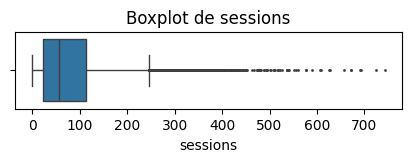

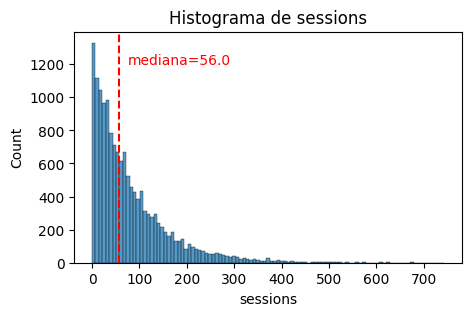

In [7]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('Boxplot de sessions');

plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, f'mediana={median}', color='red')  #Usamos f-string directo
plt.title('Histograma de sessions');

Distribución sesgada a la derecha, mediana de 56 sesiones. Algunos usuarios tienen valores atípicos (> 700 sesiones).

* drives

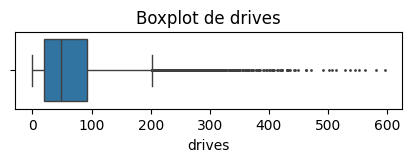

In [8]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('Boxplot de drives');

Distribución similar a sessions, sesgada a la derecha, mediana de 48 viajes.

In [9]:
# Función auxiliar para histogramas
def histogrammer(column_str, median_text=True, **kwargs):
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)
    plt.axvline(median, color='red', linestyle='--')
    if median_text==True:
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Mediana:', median)
    plt.title(f'Histograma de {column_str}')

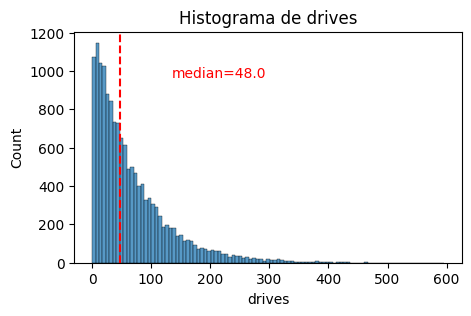

In [10]:
# Histogram
histogrammer('drives')

La información sobre los trayectos sigue una distribución similar a la de la variable sesiones. Tiene un sesgo recto, aproximadamente logarítmico normal, con una mediana de 48. Sin embargo, algunos conductores han realizado más de 400 trayectos en el último mes.

* total_sessions

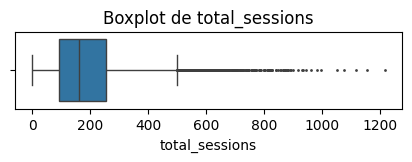

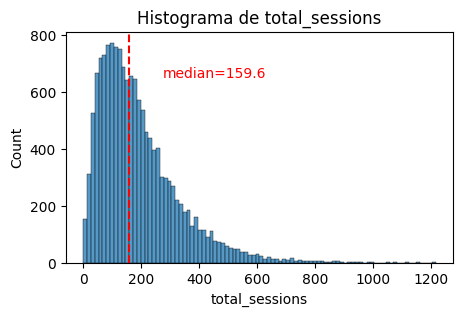

In [11]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('Boxplot de total_sessions');

histogrammer('total_sessions')

Distribución sesgada a la derecha, mediana de 159.6 sesiones totales.

* n_days_after_onboarding

Mediana: 1741.0


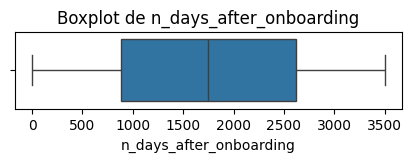

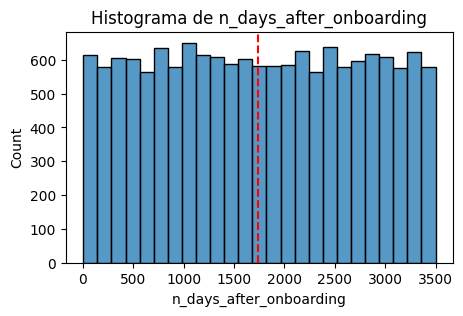

In [13]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('Boxplot de n_days_after_onboarding');

histogrammer('n_days_after_onboarding', median_text=False)

* driven_km_drives

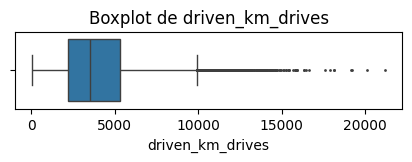

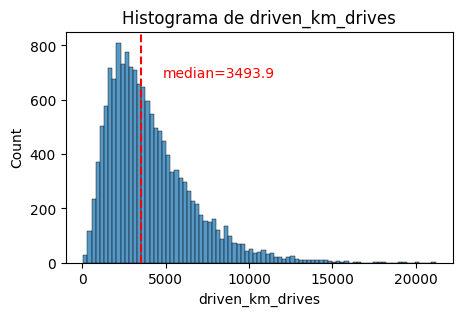

In [14]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('Boxplot de driven_km_drives');

histogrammer('driven_km_drives')

Distribución sesgada a la derecha, mediana de 3,495 km conducidos. Valores atípicos muy altos.

* duration_minutes_drives

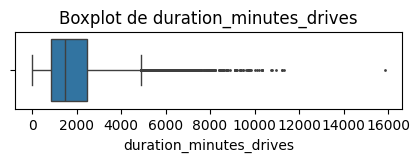

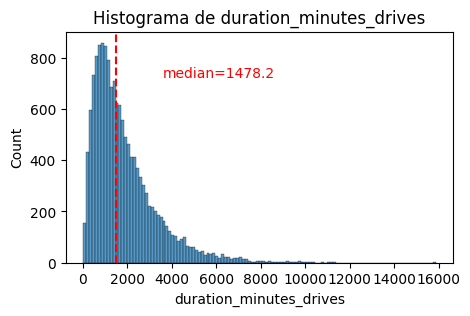

In [15]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('Boxplot de duration_minutes_drives');

histogrammer('duration_minutes_drives')

Distribución fuertemente sesgada a la derecha, mediana de ~1,478 minutos.

* activity_days

Mediana: 16.0


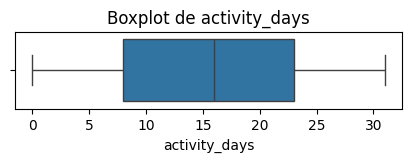

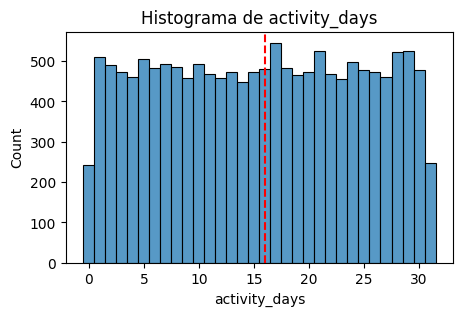

In [16]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('Boxplot de activity_days');

histogrammer('activity_days', median_text=False, discrete=True)

Distribución casi uniforme, mediana de 16 días de actividad.

* driving_days

Mediana: 12.0


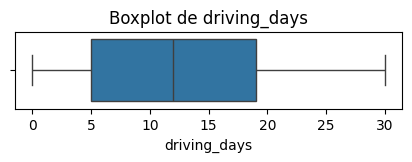

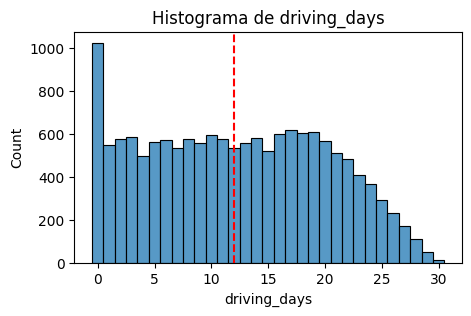

In [17]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('Boxplot de driving_days');

histogrammer('driving_days', median_text=False, discrete=True)

Distribución casi uniforme, mediana de 12 días de conducción.

El número de días que los usuarios condujeron cada mes es casi uniforme, y se correlaciona en gran medida con el número de días que abrieron la aplicación ese mes, salvo que la distribución de driving_days se reduce a la derecha. Sin embargo, hubo casi el doble de usuarios (~1.000 frente a ~550) que no condujeron en absoluto durante el mes. Esto puede parecer contradictorio si se considera junto con la información de activity_days. Esa variable tenía ~500 usuarios que abrían la aplicación en cada uno de los recuentos de la mayoría de los días, pero sólo había ~250 usuarios que no abrían la aplicación en absoluto durante el mes y ~250 usuarios que abrían la aplicación todos los días. Márcalo para investigarlo más adelante.

* device

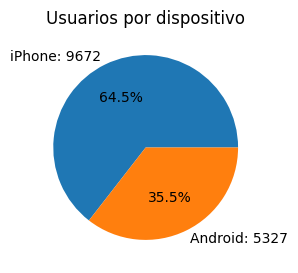

In [18]:
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Usuarios por dispositivo');

* label

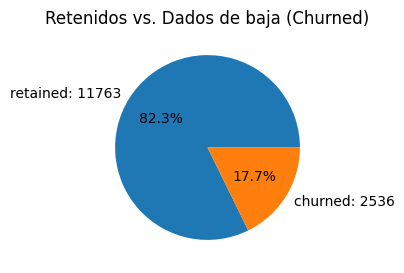

In [20]:
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Retenidos vs. Dados de baja (Churned)');

Se exploraron las relaciones entre variables utilizando histogramas combinados y diagramas de dispersión.

* driving_days vs. activity_days:

30
31


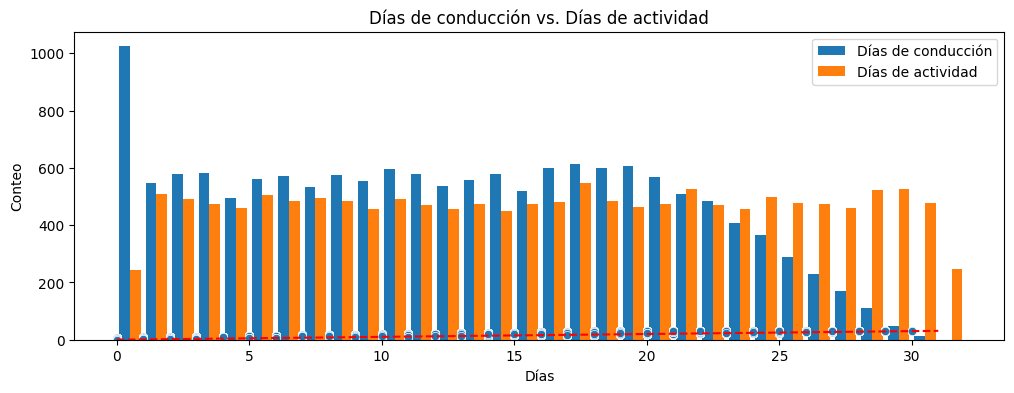

In [ ]:
plt.figure(figsize=(12,4))
label=['Días de conducción', 'Días de actividad'] # Etiquetas en español
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('Días')
plt.ylabel('Conteo')
plt.legend()
plt.title('Días de conducción vs. Días de actividad');

In [22]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


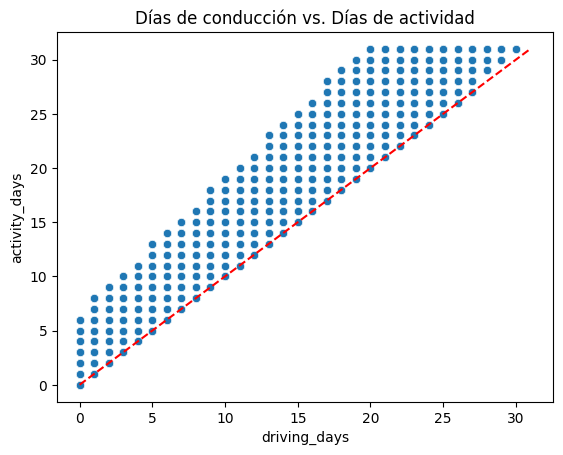

In [23]:
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('Días de conducción vs. Días de actividad')
plt.plot([0,31], [0,31], color='red', linestyle='--');

Se observa una relación lineal, donde los días de conducción nunca superan los días de actividad. Hay menos usuarios que no usaron la app en absoluto que usuarios que no condujeron.



* Retención por dispositivo

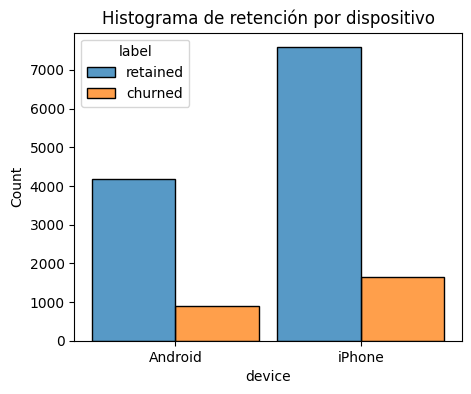

In [24]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Histograma de retención por dispositivo');

La proporción de churn es similar en ambos tipos de dispositivos.

* Retención por kilómetros conducidos por día:

In [26]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

/home/edgar/Virtualenv/ts_dl_cookbook/lib64/python3.9/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [27]:
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

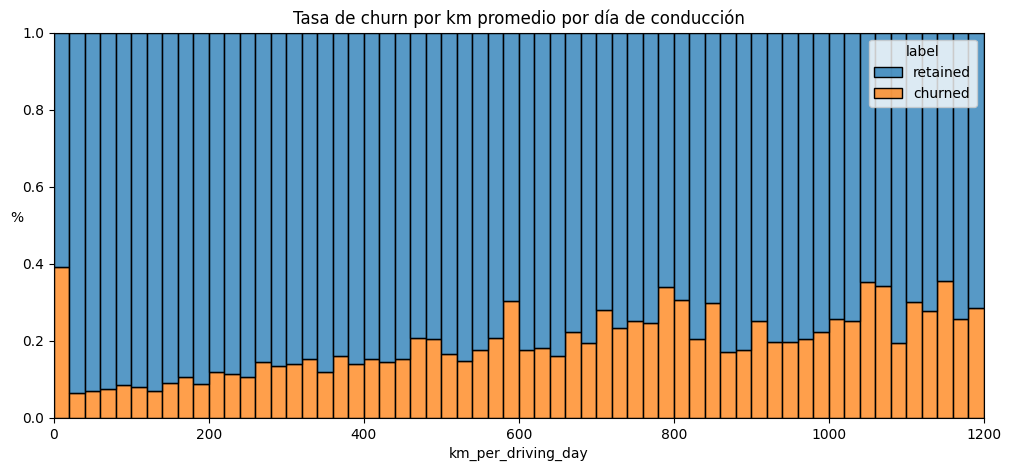

In [28]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Tasa de churn por km promedio por día de conducción');

La tasa de abandono (churn) aumenta a medida que aumenta la distancia media diaria conducida.

* Tasa de churn por número de días de conducción

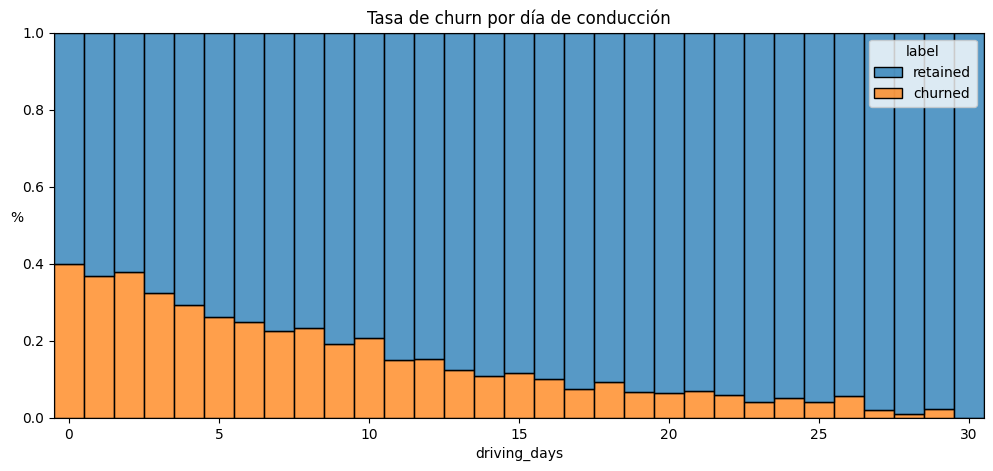

In [29]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
            x='driving_days',
            bins=range(1,32),
            hue='label',
            multiple='fill',
            discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Tasa de churn por día de conducción');

La tasa de churn es más alta para los usuarios que menos usaron Waze en el último mes.

Proporción de sesiones en el último mes:

In [30]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

In [31]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Mediana: 0.4


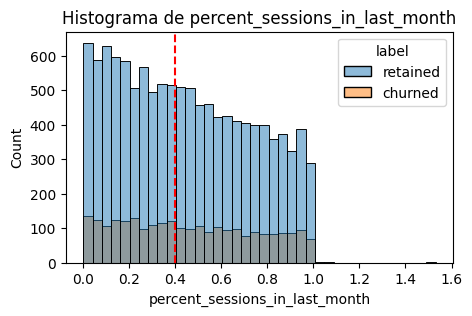

In [32]:
histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

In [33]:
df['n_days_after_onboarding'].median()

1741.0

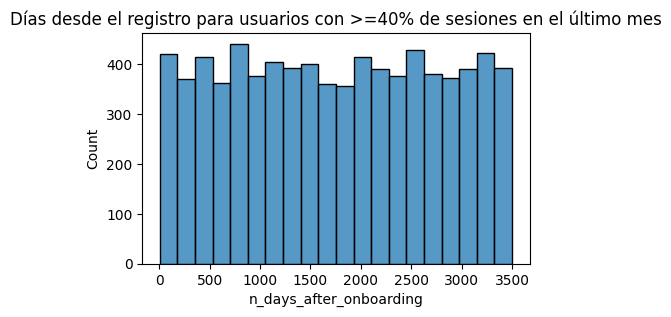

In [34]:
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Días desde el registro para usuarios con >=40% de sesiones en el último mes');

Muchos usuarios antiguos tuvieron un uso inusualmente alto en el último mes.

**Manejo de valores atípicos**

Se implementó una función para imputar valores atípicos (por encima del percentil 95) con el valor del percentil 95 en las variables sessions, drives, total_sessions, driven_km_drives, duration_minutes_drives.

In [35]:
def outlier_imputer(column_name, percentile):
    threshold = df[column_name].quantile(percentile)
    df.loc[df[column_name] > threshold, column_name] = threshold
    print(f'{column_name:>25} | percentil: {percentile} | umbral: {threshold}')

In [ ]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
    outlier_imputer(column, 0.95)

In [36]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,578.963113,0.449255
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110,1.530637


In [37]:
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,0.798587
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,0.809524
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791,0.404229,0.911504
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,228.224906,0.012673,0.666667
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,394.602623,0.221499,0.897436
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,132.585488,0.310573,0.807018
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,2014.486765,0.343134,0.809524


Resultados:

* Distribuciones: la mayoría de las variables numéricas presentan distribuciones sesgadas a la derecha o uniformes.

* Datos problemáticos: se identificaron valores atípicos extremos y una posible inconsistencia en la duración máxima de los meses.

* Tasa de churn: 17.7%, consistente entre dispositivos.

Correlaciones con el abandono (churn):

* Positiva: distancia conducida por día de conducción.
 
* Negativa: número de días de conducción.

* Antigüedad de los usuarios: distribución uniforme, desde usuarios nuevos hasta usuarios con ~10 años.

Recomendaciones:

* Investigar la causa de los datos faltantes en label.

* Profundizar en el comportamiento de los usuarios con valores atípicos.

* Analizar la relación entre la antigüedad del usuario y el churn.

* Segmentar a los usuarios por demografía y patrones de uso.

Conclusión

Este análisis exploratorio reveló patrones clave en el comportamiento de los usuarios de Waze, identificando factores asociados al churn y áreas que requieren mayor investigación. Los hallazgos proporcionan una base sólida para desarrollar estrategias de retención más efectivas y realizar análisis predictivos.

Este reporte, con su código integrado y su narrativa clara, está listo para ser incluido en tu portafolio como un ejemplo de tu capacidad para realizar análisis exploratorios de datos de manera profesional.